# Exercise 11: Monte Carlo methods
# Duy Tommy Tran

#### Importing library

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import math

from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib notebook
%matplotlib inline

In [2]:
# Defining some figure parameters
mpl.rcParams.update({'figure.figsize': (10.0, 7),                   # Figuresize
                     'legend.fontsize': 17, 'legend.handlelength': 3, # Legend
                     'xtick.labelsize': 15, 'ytick.labelsize': 15,    # Tick-sizes of the axes
                     'font.size': 15})                                # Fontsize

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

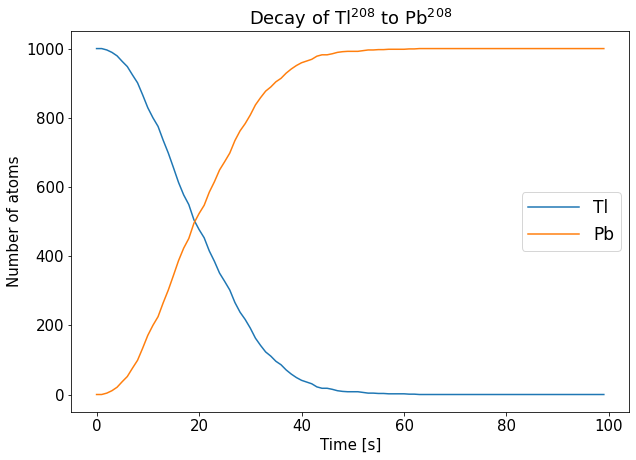

In [3]:
def p(t):
    return 1-2**(-t/tau)

def lcg():
    a = 1140671485
    c = 128201163
    m = 2**24
    global x
    x = (a*x + c) % m
    return x / m


tau = 3.052 * 60 # [tau] = seconds
t = np.arange(0,100)

n_Tl = [1000]
n_Pb = [0]


for i in range(len(t)-1):
    atoms_decay = 0
    x = np.random.randint(1000)
    random_num = [lcg() for i in range(n_Tl[i])]
    for num in random_num:
        if num < p(t[i]):
            atoms_decay += 1
    n_Tl.append(n_Tl[i] - atoms_decay)
    n_Pb.append(n_Pb[i] + atoms_decay)


plt.title('Decay of Tl$^{208}$ to Pb$^{208}$')
plt.plot(t, n_Tl, label = 'Tl')
plt.plot(t, n_Pb, label = 'Pb')
plt.ylabel('Number of atoms')
plt.xlabel('Time [s]')
plt.legend()
plt.show()

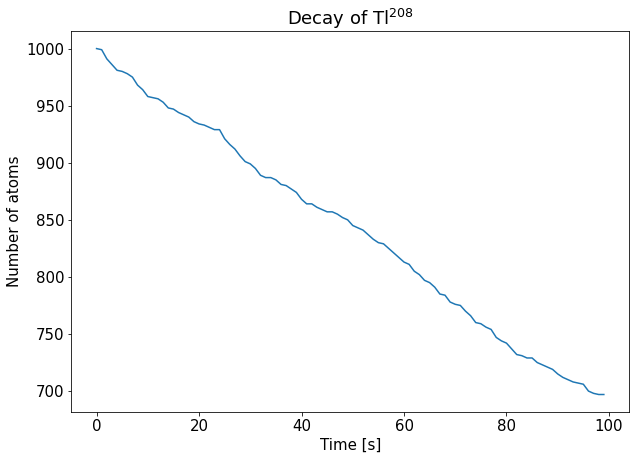

In [4]:
# Inverting the probability distribution and solving for t yields:
def inverse_transform(y):
    return - tau * np.log(1 - y)/np.log(2)

y = np.random.random(n_Tl[0])
decay_times = inverse_transform(y)
n_Tl2 = np.ones(len(t))*n_Tl[0]

for i in range(len(t)):
    decayed_Tl = len(decay_times[i > decay_times])
    n_Tl2[i] = n_Tl[0] - decayed_Tl
    

plt.title('Decay of Tl$^{208}$')
plt.plot(n_Tl2)
plt.ylabel('Number of atoms')
plt.xlabel('Time [s]')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

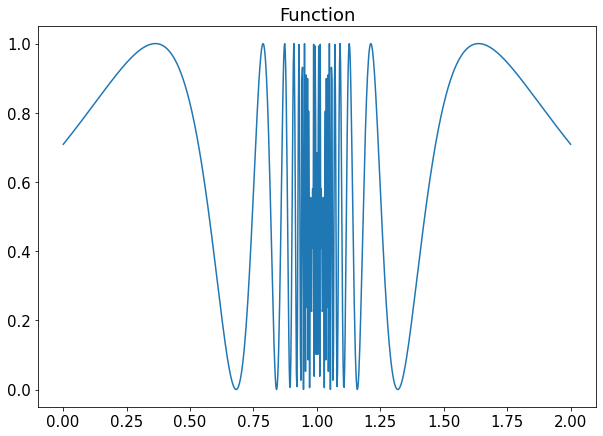

In [5]:
def f(x):
    return (np.sin(1/(1-x)))**2

x=np.linspace(0.001, 1.999, 1000)

plt.title('Function')
plt.plot(x, f(x))
plt.show()

In [6]:
# Monte Carlo integration
def monte_carlo(f):
    N = 100000                     # throws
    k = 0                          # counts
    A = 2*1                        # all possible outcomes area in range for x in (0,2) and y in (0,1)
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): k += 1
    return A * k/N

def std_mean(method, f):
    N = 10
    I = np.zeros(N)
    for i in range(N): I[i] = method(f)
    
    mean = np.mean(I)
    std_mean = mean/np.sqrt(N-1)   # standard deviation of the mean
    
    print(f'Standard deviation of the mean: {std_mean}')
    print(f'std: {np.std(I)}')

In [7]:
print('Method: Monte carlo')
print(f'Integral: {monte_carlo(f)}')
std_mean(monte_carlo, f)

Method: Monte carlo
Integral: 1.34598
Standard deviation of the mean: 0.4493606666666667
std: 0.0016705077072554791


In [8]:
def mean_value_method(f):
    N = 100000
    
    x = np.random.random(N) * 2  # x is random uniform between 0 and 2
    sigma = np.sum(f(x))
    
    global a, b
    
    return (b-a)/N * sigma

a = 0
b = 2

print('Method: mean value')
print(f'Integral: {mean_value_method(f)}')
std_mean(mean_value_method, f)

Method: mean value
Integral: 1.3445920145649377
Standard deviation of the mean: 0.4488349675608488
std: 0.0023026138180245906


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [9]:
# 2D
def f(x,y):
    if x**2 + y**2 <= 1: return 1
    else: return 0
    
def mean_value_method_2D(f, V):
    N = 100000
    
    x = np.random.random(N)*2 - 1
    y = np.random.random(N)*2 - 1
    
    sigma = 0
    for i in range(N):
        sigma += f(x[i], y[i])
    
    return V/N * sigma

I = mean_value_method_2D(f, 2*2)
print(f'Integral in 2D: {I}')

Integral in 2D: 3.14724


In [10]:
# 10D
def f(coords):
    f_i = np.sum(coords**2, axis=0) <= 1
    return np.sum(f_i)

def mean_value_method_10D(f, V):
    N = 100000
    coords = np.random.random((10,N))*2 - 1
    
    return V/N * f(coords)

I = mean_value_method_10D(f, 2**10)
print(f'Integral in 10D: {I}')

Integral in 10D: 2.37568


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [11]:
def f(x):
    return (x**(-1/2))/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

In [12]:
N = 100
a = 0.0007
b = 1
x = np.linspace(a, b, N)
dx = x[1] - x[0]

I = 1/N * np.sum(f(x)/w(x)) * np.sum(w(x))*dx
print(f'Integration with importance sampling method: {I}')

Integration with importance sampling method: 0.8474284921226085
